# Predicting Credit Card Approval

Commercial banks receive _a lot_ of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

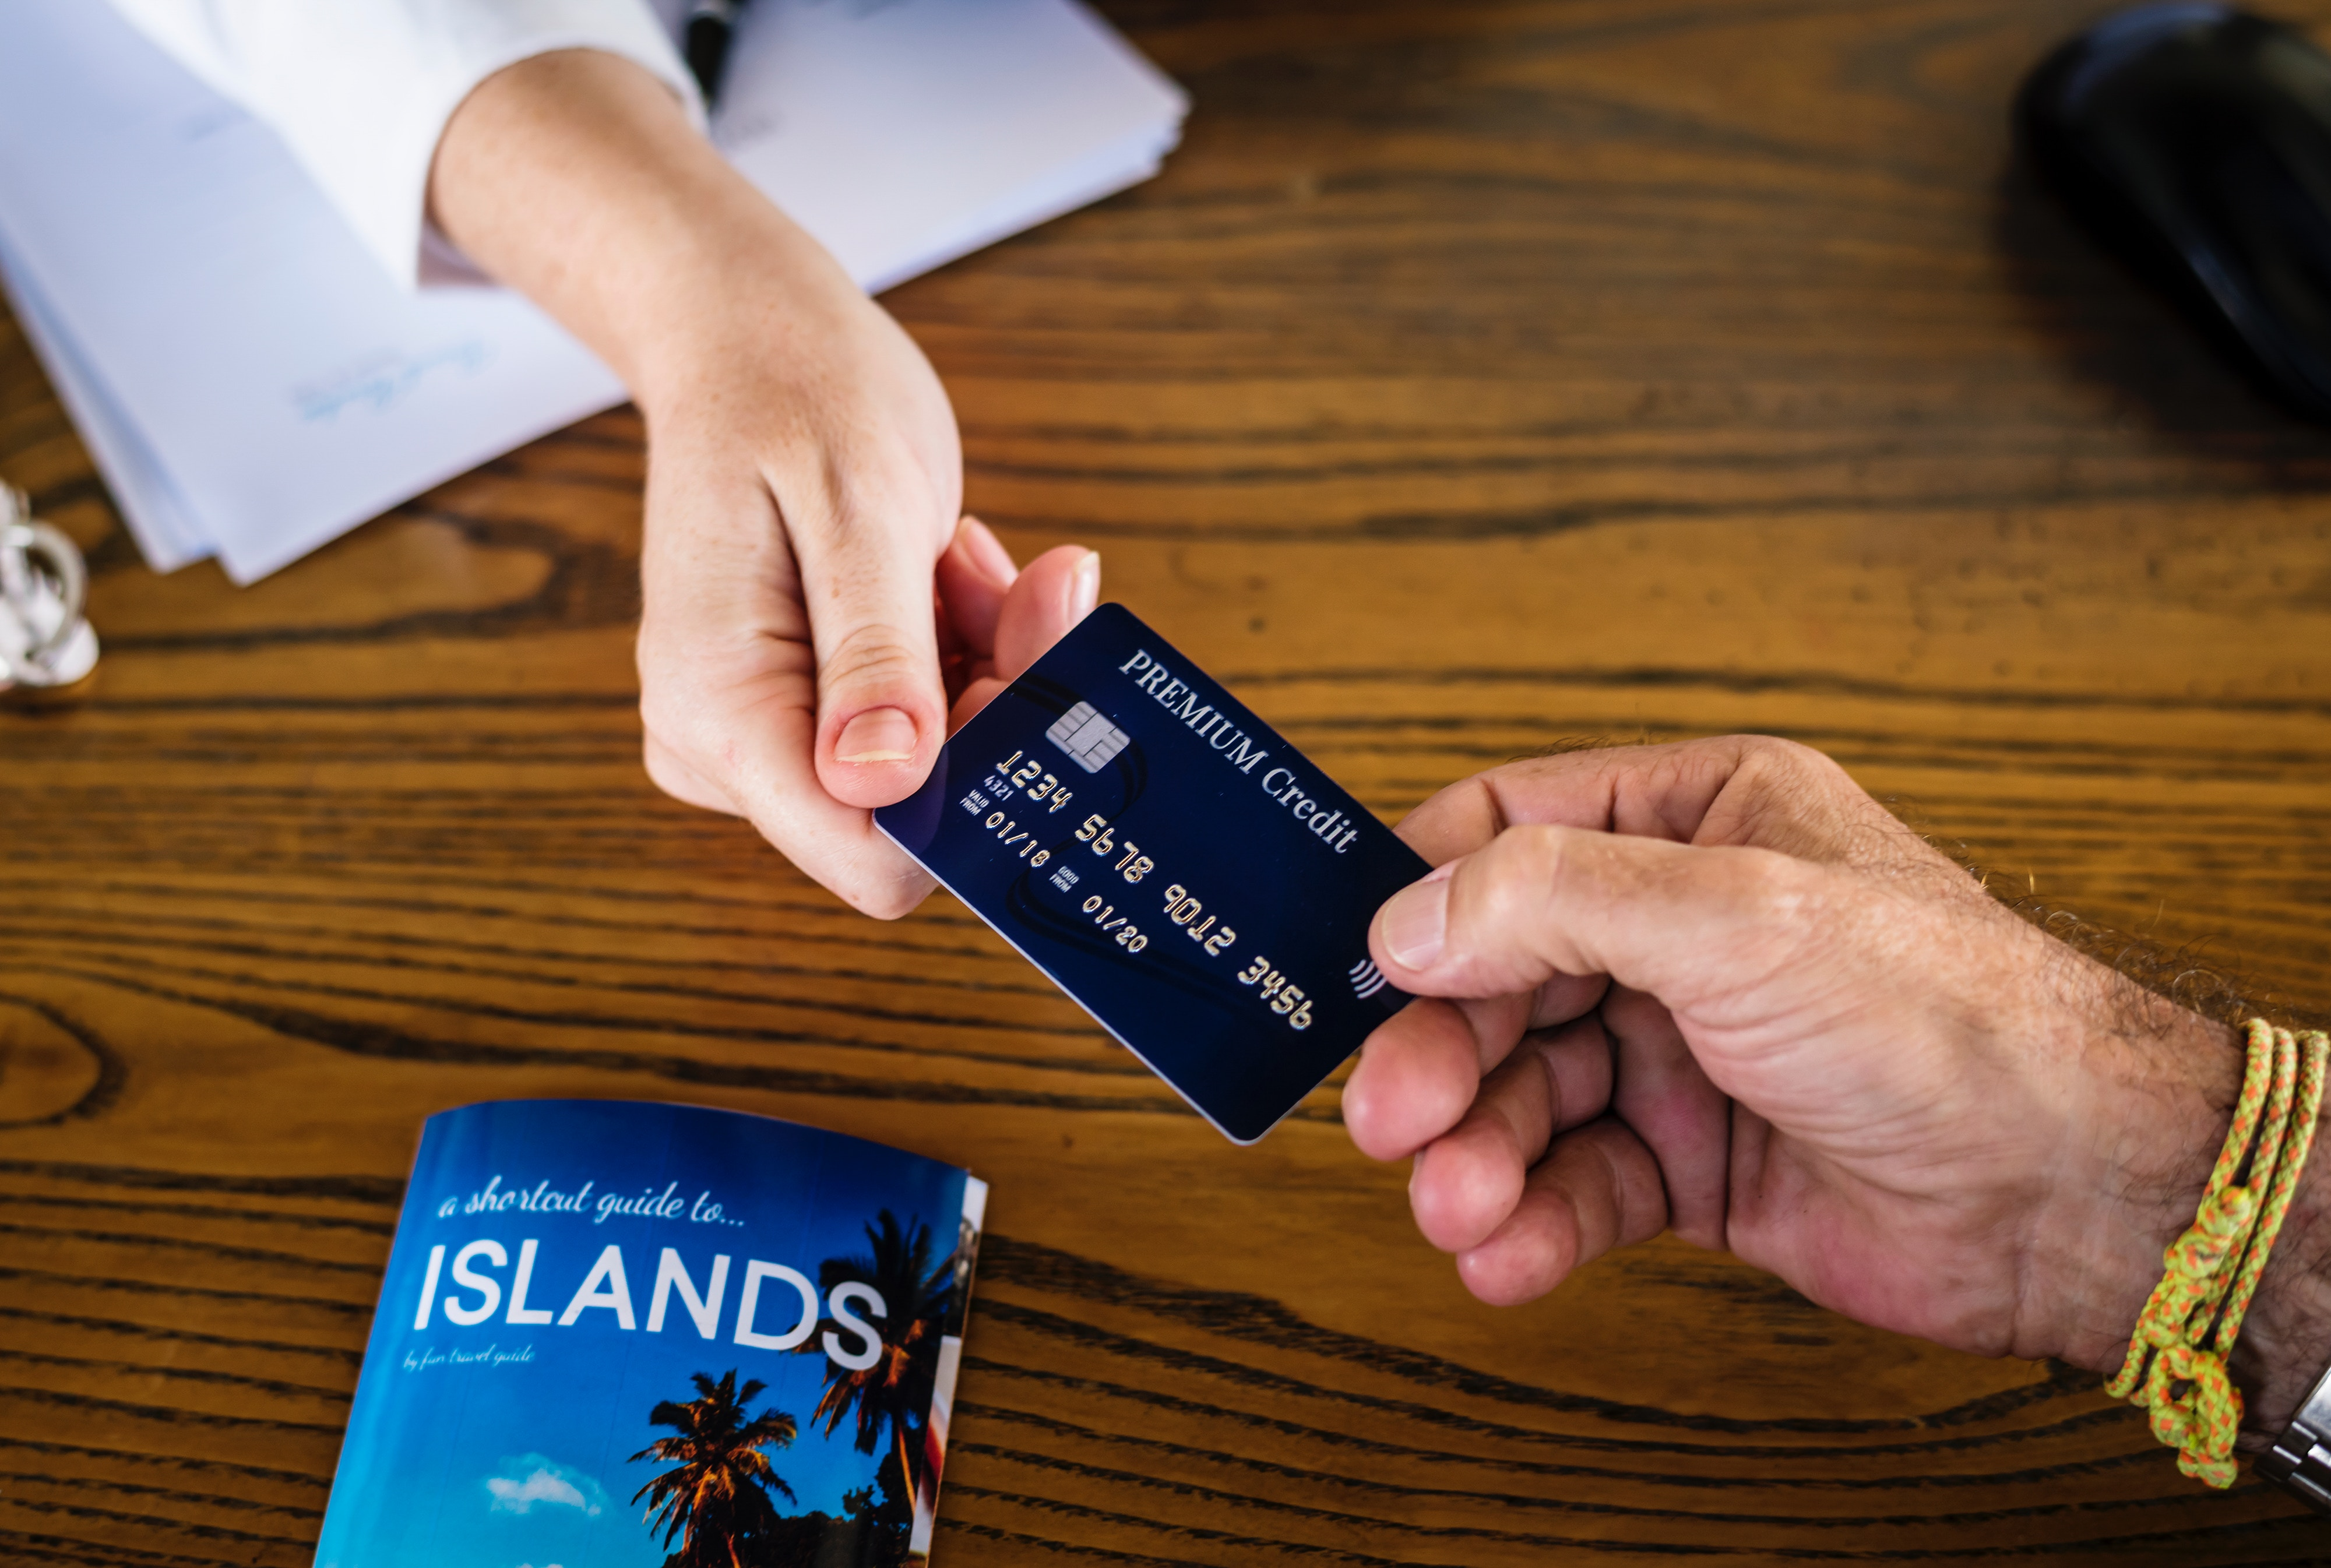

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load the dataset
cc_apps = pd.read_csv("cc_approvals.data", header=None)

# The features of this dataset have been anonymized to protect the privacy, but this blog gives us a pretty good overview of the probable features.
blog = 'https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html'

cc_apps.columns =  ["Gender",
                    "Age",
                    "Debt",
                    "Married",
                    "BankCustomer",
                    "EducationLevel",
                    "Ethnicity",
                    "YearsEmployed",
                    "PriorDefault",
                    "Employed",
                    "CreditScore",
                    "DriversLicense",
                    "Citizen",
                    "ZipCode",
                    "Income",
                    "ApprovalStatus"]
cc_apps.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [24]:
# Preprocessing
cc_apps.isna().sum()

for column in cc_apps.columns:
    print("\nUnique values from {} column: \n".format(column))
    print(cc_apps[column].unique())


Unique values from Gender column: 

['b' 'a' '?']

Unique values from Age column: 

['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '4

As we can see, missing values in the dataset are represented by '?'. Therefore, we will clean the data to handle these missing values appropriately.

In [32]:
cc_apps_clean = cc_apps.copy()
for column in cc_apps_clean.columns:
    cc_apps_clean[column].replace(to_replace='?', value=np.nan, inplace=True)
    cc_apps_clean[column].fillna(cc_apps_clean[column].mode()[0], inplace=True)

cc_apps_clean.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [35]:
categorical_columns = ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'ApprovalStatus']

# One-hot encode the categorical columns
cc_apps_encoded = pd.get_dummies(cc_apps_clean, columns=categorical_columns, drop_first=True)

X = cc_apps_encoded.drop(['ApprovalStatus_-'], axis=1)
y = cc_apps_encoded['ApprovalStatus_-']


In [37]:
# Split into data_train and data_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

# Use MinMaxScaler to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

# Create Logistical Regression model
lr = LogisticRegression(random_state=42)
lr.fit(rescaledX_train, y_train)

y_pred = lr.predict(rescaledX_test)

# Get accuracy
accuracy = lr.score(rescaledX_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8605072463768116


The model got an accuracy of 0.86, which is not bad at all. But, we could get an even better model through hyperparameter tuning.

In [ ]:
# Define the grid of hyperparameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter': [100, 200, 300]
}

# Instantiate 10-fold CV grid search object
grid = GridSearchCV(estimator = lr,
                    param_grid = param_grid,
                    scoring = 'accuracy',
                    cv= 3,
                    n_jobs= -1)

# Fit 'grid' to the training data
grid.fit(X_train, y_train)

In [43]:
# Extract best hyperparameters
best_hyperparams = grid.best_params_
print('Best hyperparameters:\n', best_hyperparams)

# Extract best CV score
best_CV_score = grid.best_score_
print('\nBest CV accuracy:\n', best_CV_score)

# Extract best model
best_model = grid.best_estimator_

# Evaluate test set accuracy
best_acc = best_model.score(X_test, y_test)

print("\nTest set accuracy of best model: {:.3f}".format(best_acc))

Best hyperparameters:
 {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

Best CV accuracy:
 0.8115942028985508

Test set accuracy of best model: 0.870


The model obtained after hyperparameter tuning is slightly better (+ 0.01 accuracy).

Next, we'll create a user-friendly function to incorporate this optimized model for executing the intended task.

In [42]:
def CardApprovalModel(clients_data):
    """
    Function to predict card approval using a pre-trained model and input client data

    Parameters:
    - clients_data: DataFrame containing clients data with column ApprovalStatus (which values are unkwnown)
                  and features used for prediction

    Returns:
    - DataFrame clients_data with predicted approval status
    """


    # Process data function
    def process_data(data):

      categorical_columns = ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'ApprovalStatus']

      # One-hot encode the categorical columns
      data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

      X = data_encoded.drop(['ApprovalStatus_-'], axis=1)

      # Use MinMaxScaler to rescale X_train and X_test
      scaler = MinMaxScaler(feature_range=(0, 1))
      rescaledX_train = scaler.fit_transform(X_train)

      return rescaledX_train

    # Process client data
    X = process_data(clients_data)

    # Predict approval status using a pre-trained model
    y_pred = best_model.predict(X)

    # Create DataFrame with Loan ID and predicted Loan Status
    clients_data["ApprovalStatus"] = y_pred

    return clients_data
